# **Business Case: Porter Neural Networks Regression**

## **About Porter**

Porter is India's Largest Marketplace for **Intra-City Logistics**. Leader in the country's **$40 billion** intra-city logistics market, Porter strives to improve the lives of **1,50,000+ driver-partners** by providing them with consistent earning & independence. Currently, the company has serviced **5+ million customers**. Porter works with a wide range of restaurants for delivering their items directly to the people.

##**Business Problem**

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to **get an estimated delivery time** that it can provide to the customers on the basis of what they are ordering, from where and also the delivery partners. Delivery time is a **critical** aspect of **customer satisfaction** in logistics.

Porter wants **insights** from the available dataset which can enhance Porter's operational **efficiency**, ensuring timely deliveries and improving driver-partner allocation.

###**Our Task:**

We are given dataset encompassing various aspects of orders and deliveries. Our primary goals is:
1. To **accurately predict delivery times**, a critical aspect of customer satisfaction in logistics by leveraging the power of neural networks.

Apart from this we also need to **analyze** this dataset and provide **insights** into delivery dynamics, efficiency bottlenecks, and optimization opportunities for porter.

# **1. Exploratory Data Analysis - 1**

In [181]:
#Importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
import warnings
#Ignore all warnings
warnings.filterwarnings("ignore")

In [183]:
#Downloading File
!gdown 1W_MdLKdaJw4BewMATWkp_n4X3P3TH2xh

Downloading...
From: https://drive.google.com/uc?id=1W_MdLKdaJw4BewMATWkp_n4X3P3TH2xh
To: /content/porter_dataset.csv
100% 23.8M/23.8M [00:00<00:00, 61.1MB/s]


In [184]:
#Loading data as pandas dataframe
df = pd.read_csv("porter_dataset.csv")

In [185]:
#Dataframe
pd.set_option('display.max_columns', 50)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [186]:
#columns
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

### **Column Description**

1. **market_id** : integer id for the market where the restaurant lies
2. **created_at** : the timestamp at which the order was placed
3. **actual_delivery_time** : the timestamp when the order was delivered
4. **store_primary_category** : category for the restaurant
5. **order_protocol** : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
6. **total_items** : total number if item in the order
7. **subtotal** : final price of the order
8. **num_distinct_items** : the number of distinct items in the order
9. **min_item_price** : price of the cheapest item in the order
10. **max_item_price** : price of the costliest item in order
11. **total_onshift_partners** : number of delivery partners on duty at the time order was placed
12. **total_busy_partners** : number of delivery partners attending to other tasks
13. **total_outstanding_orders** : total number of orders to be fulfilled at the moment
14. **store_id**



In [187]:
#shape of the dataset
df.shape

(197428, 14)

In [188]:
#data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [189]:
#Number of unique values for each column
for i in df.columns:
  print(i,":",df[i].nunique())

market_id : 6
created_at : 180985
actual_delivery_time : 178110
store_id : 6743
store_primary_category : 74
order_protocol : 7
total_items : 57
subtotal : 8368
num_distinct_items : 20
min_item_price : 2312
max_item_price : 2652
total_onshift_partners : 172
total_busy_partners : 159
total_outstanding_orders : 281


In [190]:
#statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
market_id,196441.0,NaN,NaN,NaN,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
created_at,197428,180985,2015-01-24 01:56:33,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_delivery_time,197421,178110,2015-02-01 03:44:13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_primary_category,192668,74,american,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_protocol,196433.0,NaN,NaN,NaN,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,NaN,NaN,NaN,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,NaN,NaN,NaN,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,NaN,NaN,NaN,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,NaN,NaN,NaN,686.21847,522.038648,-86.0,299.0,595.0,949.0,14700.0


In [191]:
#missing value detection
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [192]:
(df.isna().sum() / len(df)) * 100

,0
market_id,0.499929
created_at,0.000000
actual_delivery_time,0.003546
store_id,0.000000
store_primary_category,2.411006
order_protocol,0.503981
total_items,0.000000
subtotal,0.000000
num_distinct_items,0.000000
min_item_price,0.000000


In [193]:
#Checking Duplicate
df.duplicated().sum()

np.int64(0)

### **Observations:**
1.	There are **197428 rows** and **14 columns** in our dataset.
2.	Data type of column “created_at” and “actual_delivery_time” is **“object”** although the values in them are **datetime**.
3.	**Mean** order value is around Rs 2682 and mean number of total items is 3 per order.
4.	Column like “total_onshift_partners”, “total_busy_partners” and “total_outstanding_orders” have **high number of missing values** (**around 8%**) whereas columns like “market_id”, “store_primary_category” and “order_protocol” also have many **missing values**.
5.	There is **no** column for **“time taken”** for delivery which is our **target** variable for prediction. So, we will have to **create** it using available columns.


# **2. Data Preprocessing & Feature engineering**

In [194]:
#Converting datetime column to correct data type
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

In [196]:
#Creating "Target Column" : time_taken
df['time_taken']=df['actual_delivery_time'] - df['created_at']

In [197]:
df["time_taken"].head()

,time_taken
0,0 days 01:02:59
1,0 days 01:07:04
2,0 days 00:29:41
3,0 days 00:51:15
4,0 days 00:39:50


**The current format is not appropriate for target variable of Neural Network. So lets change it into minute with float datatype.**

In [198]:
df["time_taken"] = df["time_taken"].dt.total_seconds() / 60

In [199]:
df["time_taken"].head()

,time_taken
0,62.983333
1,67.066667
2,29.683333
3,51.250000
4,39.833333


In [200]:
#extracting "hour of the day" and "day of the week" information from "created_at" column
df["hour_of_day"] = df["created_at"].dt.hour
df["day_of_week"] = df["created_at"].dt.dayofweek  # Monday=0, Sunday=6

In [201]:
df[["created_at", "hour_of_day", "day_of_week"]].head()

,created_at,hour_of_day,day_of_week
0,2015-02-06 22:24:17,22,4
1,2015-02-10 21:49:25,21,1
2,2015-01-22 20:39:28,20,3
3,2015-02-03 21:21:45,21,1
4,2015-02-15 02:40:36,2,6


## **Outlier detection.**

In [202]:
#Numerical and categorical column
numerical_column = ["subtotal", "min_item_price", "max_item_price", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders", "time_taken"]

categorical_column = ["market_id", "order_protocol", "total_items", "num_distinct_items", "hour_of_day", "day_of_week"]


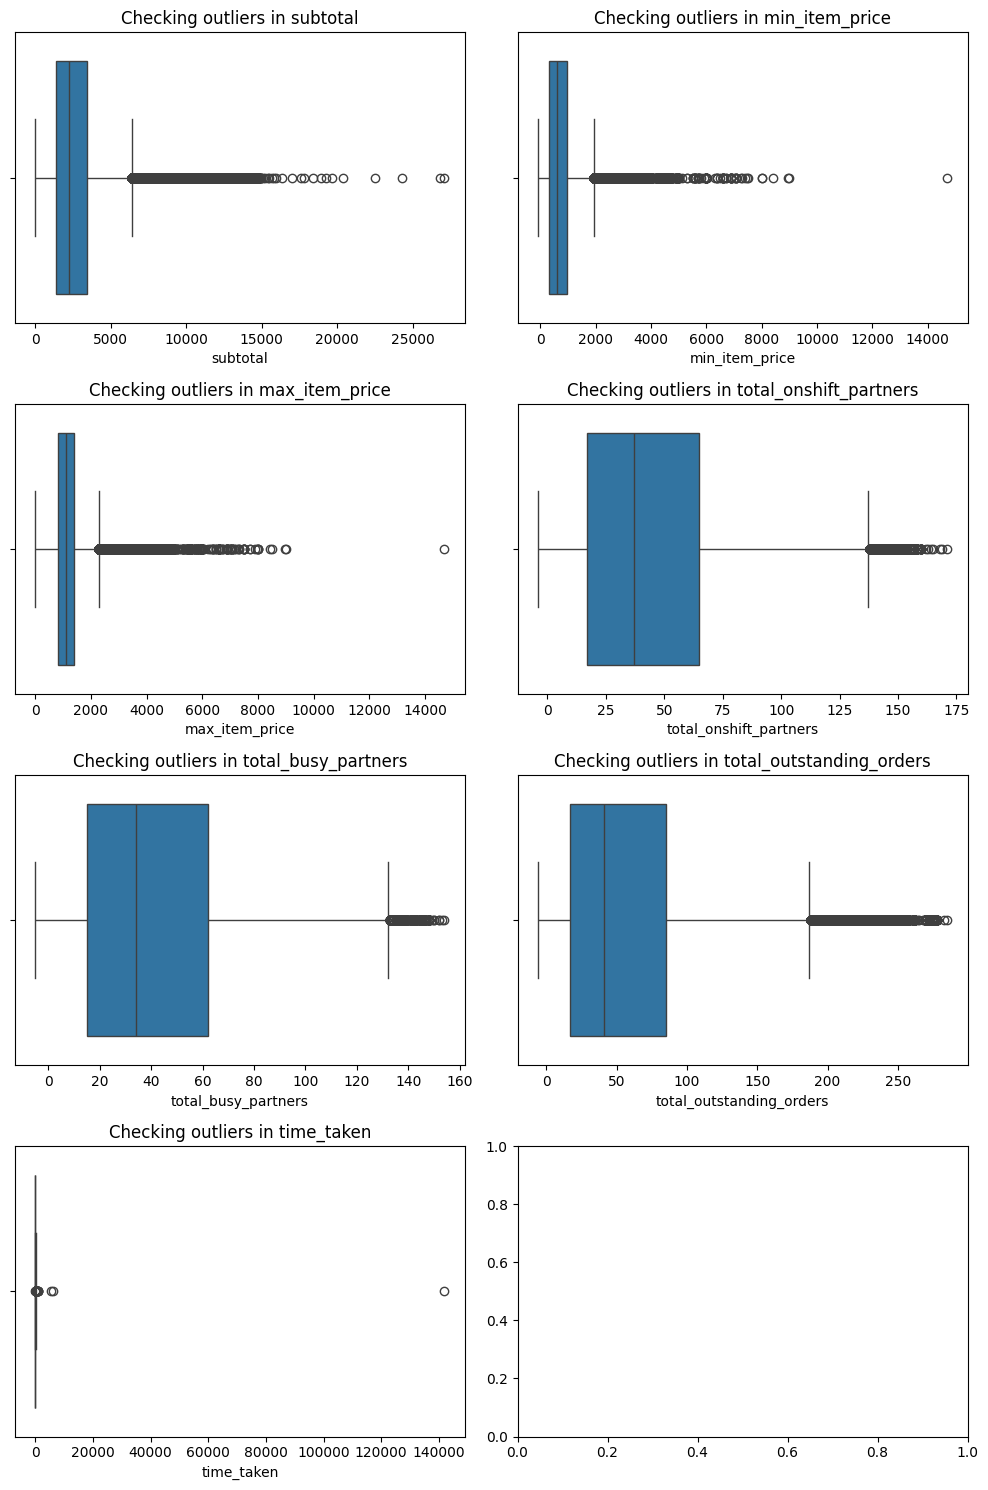

In [203]:
#Outliers visualisation using Boxplots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
    sns.boxplot(x=df[ele], ax=axes[i])
    axes[i].set_title(f"Checking outliers in {ele}")

plt.tight_layout()
plt.show()

### **Observation:**

Almost all numerical columns are affected by **outliers** with different degree of severity.

## **Outlier Treatment**

In [204]:
df.shape

(197428, 17)

In [205]:
#Removing outliers using standard deviation (Lets choose 4 std_dev as limit to decide for outlier as to be conservative)
for col in numerical_column:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (4*std)
  lower = mean - (4*std)
  df=df[(df[col]<upper) & (df[col]>lower)]

In [206]:
df.shape

(177244, 17)

### **Observation:**

After outlier treatment **177244 rows** now remains in our dataset. We originally had 197428 rows in our dataset.


## **Missing value treatment**

In [207]:
#missing value detection
df.isna().sum()

,0
market_id,902
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,4106
order_protocol,899
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [208]:
for i in ["market_id", "store_primary_category", "order_protocol"]:
  print(i,":",df[i].nunique())

market_id : 6
store_primary_category : 73
order_protocol : 7


In [209]:
for i in ["market_id", "store_primary_category", "order_protocol"]:
  print(i,":",df[i].unique())

market_id : [ 1.  2.  3.  4. nan  5.  6.]
store_primary_category : ['american' 'mexican' nan 'indian' 'italian' 'sandwich' 'thai' 'cafe'
 'salad' 'pizza' 'chinese' 'singaporean' 'burger' 'mediterranean'
 'japanese' 'greek' 'catering' 'filipino' 'convenience-store' 'other'
 'vegan' 'asian' 'barbecue' 'breakfast' 'fast' 'dessert' 'smoothie'
 'seafood' 'vietnamese' 'cajun' 'steak' 'middle-eastern' 'persian'
 'nepalese' 'korean' 'sushi' 'latin-american' 'chocolate' 'burmese'
 'hawaiian' 'british' 'pasta' 'alcohol' 'vegetarian' 'dim-sum' 'peruvian'
 'turkish' 'ethiopian' 'bubble-tea' 'german' 'french' 'caribbean'
 'gluten-free' 'comfort-food' 'gastropub' 'afghan' 'pakistani' 'moroccan'
 'tapas' 'malaysian' 'soup' 'brazilian' 'european' 'cheese' 'african'
 'argentine' 'kosher' 'irish' 'spanish' 'russian' 'southern' 'lebanese'
 'belgian' 'alcohol-plus-food']
order_protocol : [ 1.  2.  3.  4. nan  5.  6.  7.]


In [210]:
#market_id --> replacing NA with "mode"  (as its a categorical field with only 6 category and only 902 missing values)
df["market_id"] = df["market_id"].fillna(df["market_id"].mode()[0])

In [211]:
#order_protocol --> replacing NA with "mode"  (as its a categorical field with only 7 category and only 899 missing values)
df["order_protocol"] = df["order_protocol"].fillna(df["order_protocol"].mode()[0])

In [212]:
#store_primary_category --> replacing NA with "Unknown" (as there are 72 diffrenty categories and 4106 missing values, so better to add a new Unkown category)
df["store_primary_category"] = df["store_primary_category"].fillna("Unknown")

In [213]:
#missing value detection
df.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


### **Observations:**

1. All the missing values were successfully filled with values which appeared appropriate for the respective column category.
2. There are **no more missing value** in the dataset.

# **3. Exploratory Data Analysis - 2**

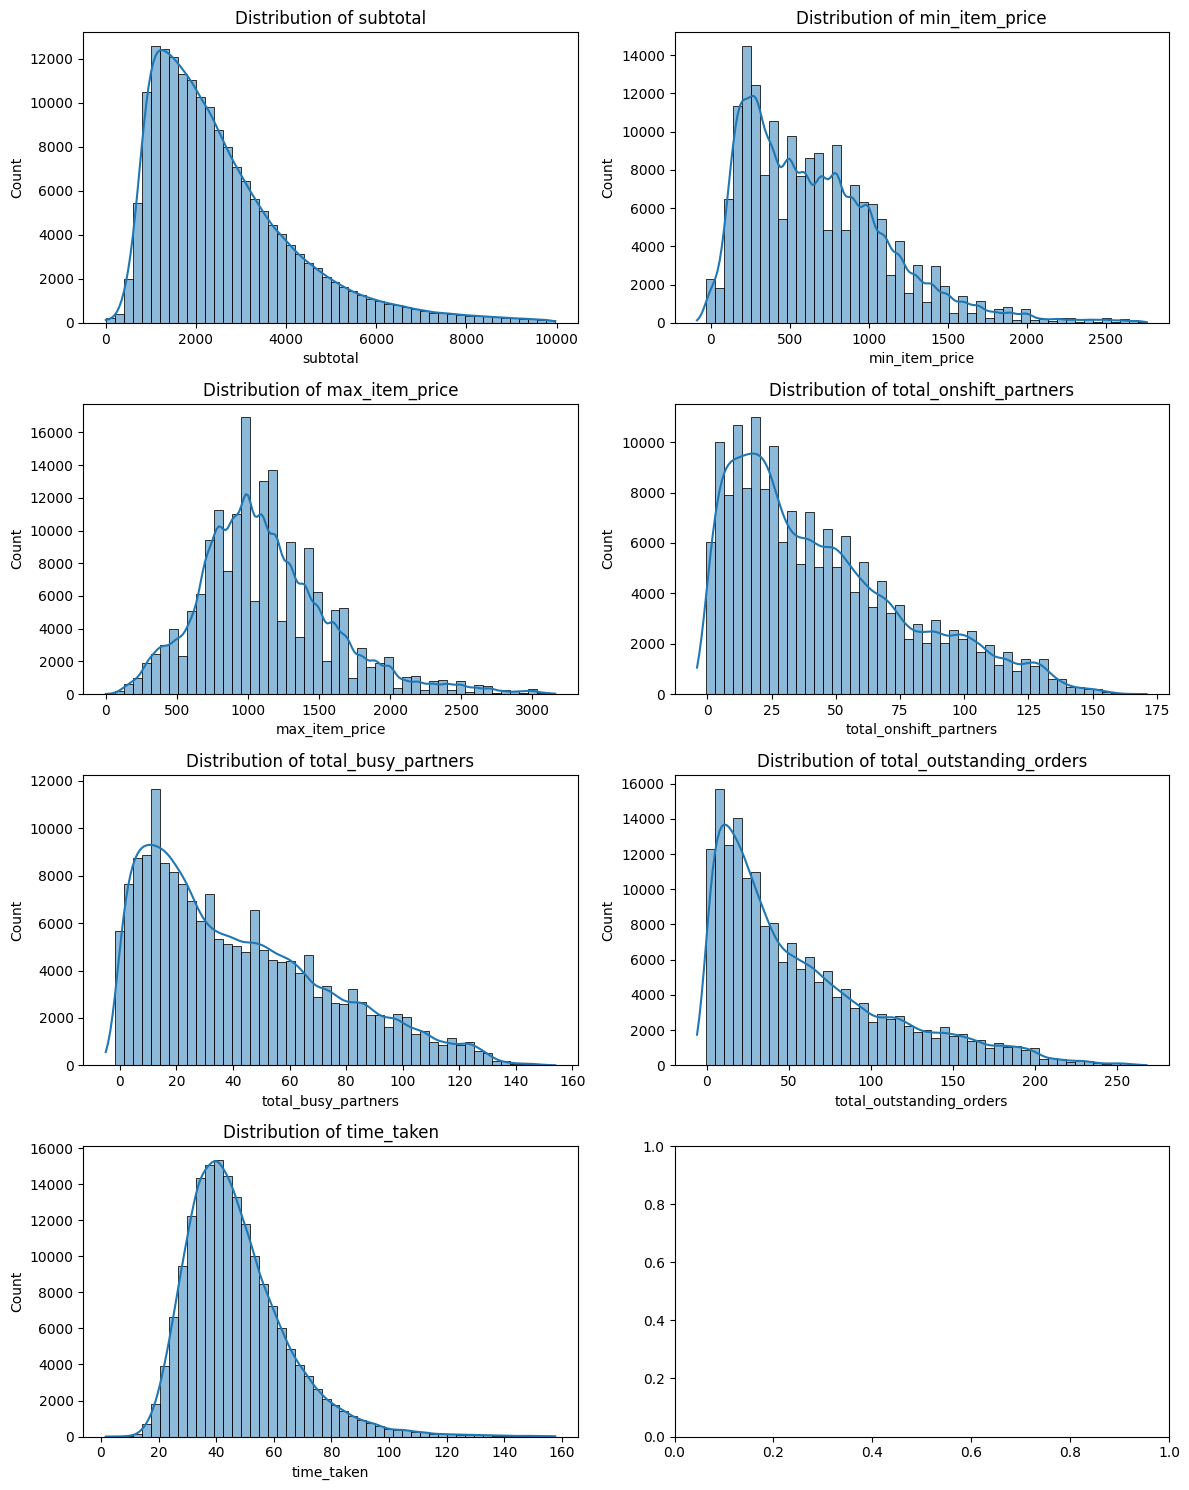

In [214]:
#Plotting Numerical Columns

fig, axes = plt.subplots(4, 2, figsize=(12, 15))
axes = axes.flatten()
for i, ele in enumerate(numerical_column):
  sns.histplot(df[ele], kde=True, bins = 50, ax=axes[i])
  axes[i].set_title(f"Distribution of {ele}")

plt.tight_layout()
plt.show()

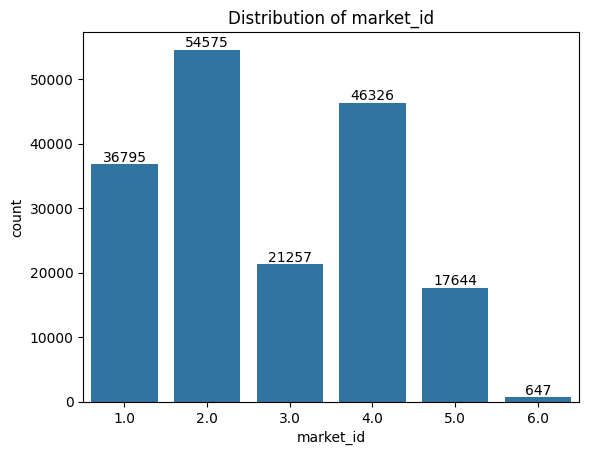

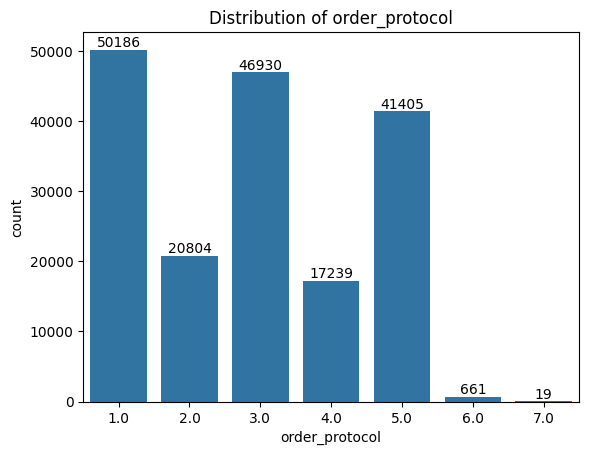

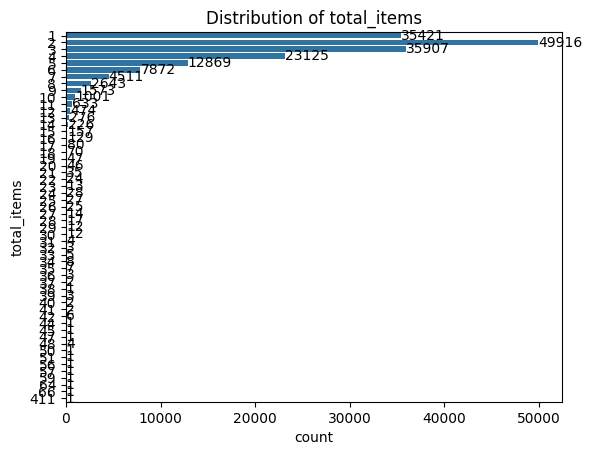

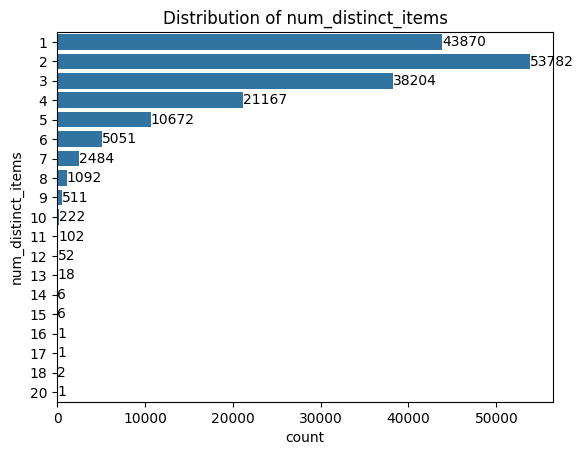

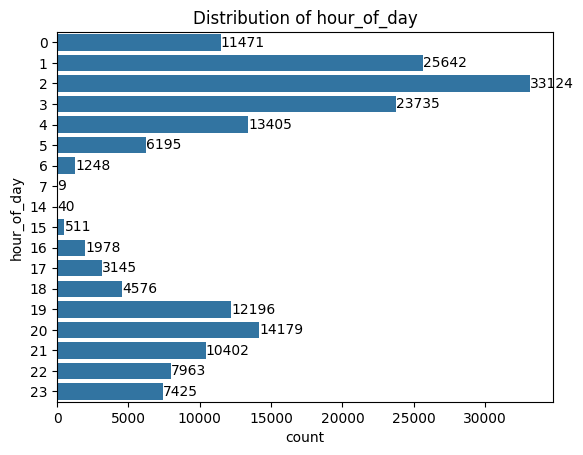

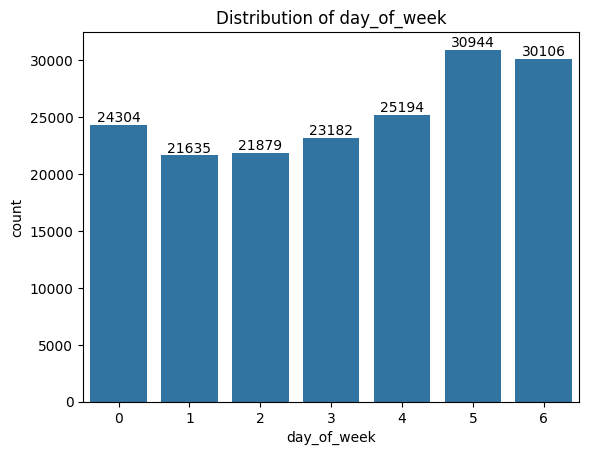

In [215]:
#Plotting Categorical Column

#plt.subplots(7, 2, figsize=(10, 20))

for ele in categorical_column:
  if (ele in ["market_id", "order_protocol","day_of_week"]):
    ax=sns.countplot(x=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

  else:
    ax=sns.countplot(y=df[ele])
    ax.bar_label(ax.containers[0])
    plt.title(f"Distribution of {ele}")
    plt.show()

### **Observations:**

1.	Most of the numerical column data are **Right-Skewed** i.e. the tail is towards the right end.
2.	**Most orders** belong to market id **2 and 4**.
3.	Market id **6** has **least** numbers of order.
4.	**Most** orders were place via order_protocol **1, 3 and 5**.
5.	Order protocol **6 and 7** have very **less** order count.
6.	**Mostly** people order **1 to 3 numbers** of items as well as distinct items.
7.	**Busiest** part of day is late night **between 1am to 3am**.
8.	There is very **less order** during late **morning and afternoon** time.
9.	Although only slightly **weekends** receive **more** numbers of orders.


## **Checking Correlation between Variables.**

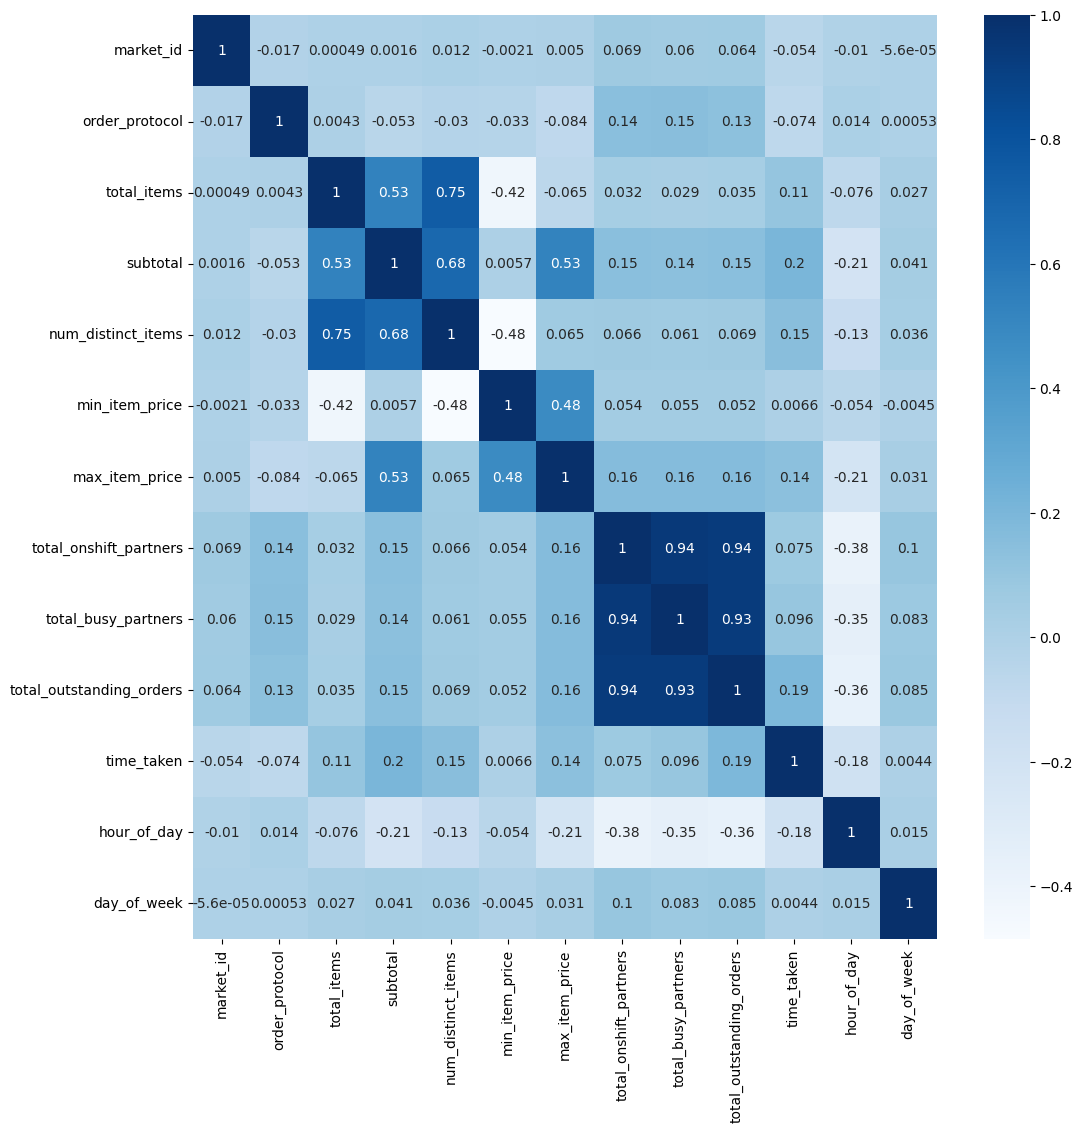

In [216]:
#Plotting Correlation Heatmap
plt.figure(figsize = (12, 12))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.show()

### **Observation:**
In general **"time_taken"** does **not** appears to have strong **coorelation** with any of the other variables. This indicates l**inear regression** might not give very good result so **Neural network** is the way to go for its prediction.

# **5. Data preparation for Model**

In [217]:
# Dropping the unrequired column
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

In [218]:
# Dropping store_id as it has 5759 categoreies. Encoding will will either cause sparsity or will lead to complex model
df.drop("store_id", axis=1,inplace=True)

In [219]:
# Lets Target Encode store_primary_category column
# Calculate the mean of the 'Target' variable for each category
category_means = df.groupby('store_primary_category')['time_taken'].mean().to_dict()

# Maping the means back to the 'Category' column to perform target encoding
df['store_primary_category'] = df['store_primary_category'].map(category_means)

In [220]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,hour_of_day,day_of_week
0,1.0,47.460645,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,44.030205,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
2,3.0,47.727817,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,20,3
3,3.0,47.727817,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,21,1
4,3.0,47.727817,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2,6


### **Data Splitting and Scaling**

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features and target
X = df.drop(columns=["time_taken"])  # Features
y = df["time_taken"]  # Target

# First, split into train (70%) and test (15%) + validation (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temp set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit scaler ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using training scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify split
print(f"Training Set: {X_train_scaled.shape}, Validation Set: {X_val_scaled.shape}, Test Set: {X_test_scaled.shape}")

Training Set: (124070, 13), Validation Set: (26587, 13), Test Set: (26587, 13)


# **6. Model building and Results Evaluation**

### **Lets Built First Neural Network Model**

In [222]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model,
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model with validation set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=30, batch_size=512)



Epoch 1/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1826.3291 - mae: 37.2800 - val_loss: 360.8065 - val_mae: 13.6433
Epoch 2/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 315.8034 - mae: 13.2882 - val_loss: 289.3467 - val_mae: 12.4964
Epoch 3/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 273.7277 - mae: 12.3754 - val_loss: 270.1669 - val_mae: 12.1803
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 261.2278 - mae: 12.0796 - val_loss: 262.1777 - val_mae: 11.9505
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 253.5351 - mae: 11.9042 - val_loss: 258.6435 - val_mae: 11.9832
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 250.4527 - mae: 11.8014 - val_loss: 255.5544 - val_mae: 11.8719
Epoch 7/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 250.4734 - mae: 11.7861 - val_loss: 251.6632 - val_mae: 11.7800
Epoch 8/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 247.4420 - mae: 11.7471 - val_loss: 249.8058 - val_mae: 11.6099
Epoch 9

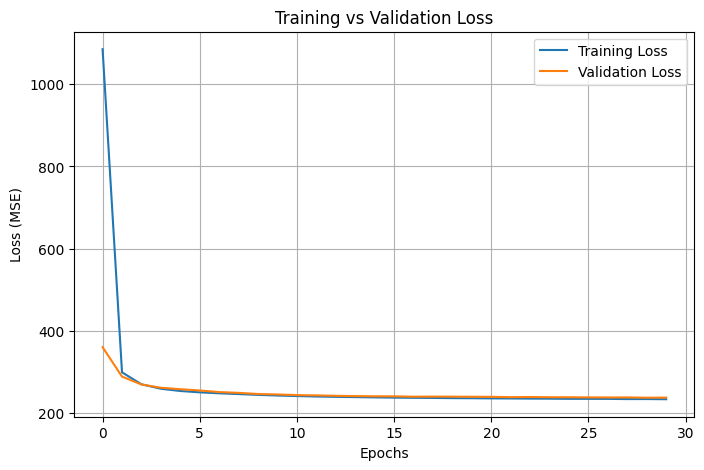

In [223]:
#Lets Plot loss graph
import matplotlib.pyplot as plt

# Extract loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [229]:
#Model's Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just sqrt of MSE

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error (MSE): 238.1017
Mean Absolute Error (MAE): 11.5236
Root Mean Squared Error (RMSE): 15.4305


## **Lets try Hyperparameter Tuning to find Better model.**

In [231]:
#Installing Keras-tuner
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.5 MB/s eta 0:00:00


In [232]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(hp.Int('units_1', min_value=32, max_value=256, step=32),
                           activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Add hidden layers dynamically based on tuning
    for i in range(hp.Int('num_layers', 1, 3)):  # Between 1 and 3 hidden layers
        model.add(layers.Dense(hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
                               activation='relu'))

    model.add(layers.Dense(1))  # Output layer for regression

    # Compile with a tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mae']
    )
    return model

# Define the tuner (Random Search)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of different hyperparameter sets to try
    executions_per_trial=1,  # Runs per configuration
    directory='keras_tuner_results',
    project_name='time_prediction'
)

# Run the tuner search
tuner.search(X_train_scaled, y_train,
             validation_data=(X_val_scaled, y_val),
             epochs=30, batch_size=512, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train the final model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(X_train_scaled, y_train,
                         validation_data=(X_val_scaled, y_val),
                         epochs=50, batch_size=512, verbose=1)



Trial 10 Complete [00h 00m 48s]
val_loss: 237.6910400390625

Best val_loss So Far: 235.3849639892578
Total elapsed time: 00h 08m 19s
Best Hyperparameters: {'units_1': 256, 'num_layers': 3, 'units_2': 112, 'learning_rate': 0.0005, 'units_3': 16, 'units_4': 16}
Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1404.8552 - mae: 30.8400 - val_loss: 324.4115 - val_mae: 12.9954
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 289.6324 - mae: 12.7222 - val_loss: 283.4899 - val_mae: 12.2614
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 265.5942 - mae: 12.1682 - val_loss: 270.0833 - val_mae: 12.0573
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 257.1939 - mae: 11.9455 - val_loss: 261.9103 - val_mae: 11.9433
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 251.9622 - mae: 11.8296 - val_loss: 255.4682 - val_mae: 11.7884
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 244.7095 - mae: 11.6679 - val_loss: 251.7048 - val_mae: 11.

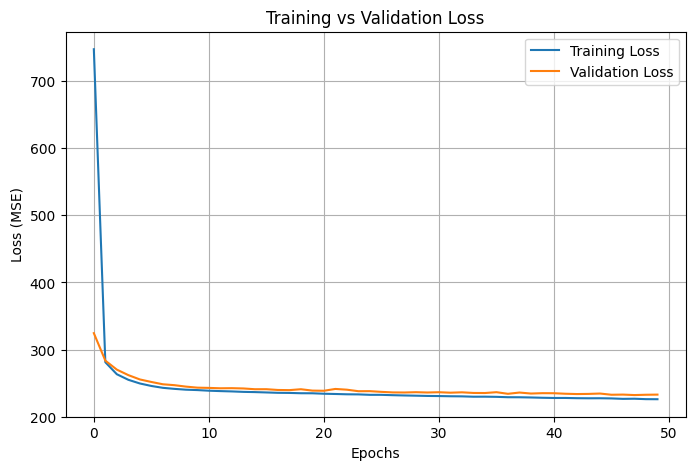

In [233]:
#Lets Plot loss graph
import matplotlib.pyplot as plt

# Extract loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [234]:
#Model's Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just sqrt of MSE

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Squared Error (MSE): 232.2984
Mean Absolute Error (MAE): 11.3470
Root Mean Squared Error (RMSE): 15.2413


## **Observation:**
Even with Hyperparameter tuning our model observed only **slight improvement**,
Mean Squared Error (MSE): **232.2984** (From 238.1017)
Mean Absolute Error (MAE): **11.3470** (From 11.5236)
Root Mean Squared Error (RMSE): **15.241** (From 15.4305)

The loss graph shows that our model **can still fit more** and lower the losses.
**So lets try making deeper neural network with more neurons.**


## **Deeper Neural Network with more neurons**

In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the improved deeper model
model = keras.Sequential([
    layers.Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Lower LR for stability
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with validation set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=30, batch_size=256, verbose=1)

# Evaluate the model
mse, mae = model.evaluate(X_test_scaled, y_test)
rmse = mse ** 0.5

print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')


Epoch 1/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1036.8048 - mae: 25.0168 - val_loss: 311.9846 - val_mae: 12.7662
Epoch 2/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 279.0295 - mae: 12.5193 - val_loss: 279.4007 - val_mae: 12.3273
Epoch 3/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 260.3179 - mae: 12.0543 - val_loss: 267.2684 - val_mae: 12.1833
Epoch 4/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 254.0734 - mae: 11.8866 - val_loss: 255.4113 - val_mae: 11.8062
Epoch 5/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 247.3522 - mae: 11.6995 - val_loss: 256.3008 - val_mae: 11.9993
Epoch 6/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 244.3831 - mae: 11.6468 - val_loss: 251.9066 - val_mae: 11.7438
Epoch 7/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 242.5614 - mae: 11.6335 - val_loss: 249.7776 - val_mae: 11.8306
Epoch 8/30
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 242.7794 - mae: 11.6180 - val_loss: 247.2851 - val_mae: 11.481

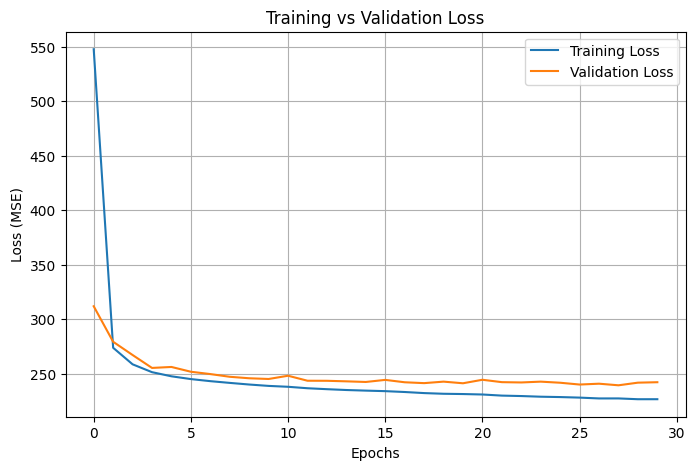

In [243]:
#Lets Plot loss graph
import matplotlib.pyplot as plt

# Extract loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
#Model's Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just sqrt of MSE

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Squared Error (MSE): 241.8720
Mean Absolute Error (MAE): 11.3774
Root Mean Squared Error (RMSE): 15.5522


### **Observation:**
Still Losses are not imporving. Seems out model is **overfitting** after 20th epoch.

## **Neural Network with less layers and more neurons.**

In [238]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the improved deeper model
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(516, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1024, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.01)  # Lets increase the learning rate this time
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with validation set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=30, batch_size=512, verbose=1) #increase the batch size and reduce epoch

# Evaluate the model
mse, mae = model.evaluate(X_test_scaled, y_test)
rmse = mse ** 0.5

print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')


Epoch 1/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - loss: 1082.4741 - mae: 22.2597 - val_loss: 265.2036 - val_mae: 11.8203
Epoch 2/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - loss: 254.0669 - mae: 11.8959 - val_loss: 256.1128 - val_mae: 11.7221
Epoch 3/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 243.6222 - mae: 11.6401 - val_loss: 252.0176 - val_mae: 12.0336
Epoch 4/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 240.9619 - mae: 11.5799 - val_loss: 244.8432 - val_mae: 11.6098
Epoch 5/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - loss: 239.0171 - mae: 11.5043 - val_loss: 244.6629 - val_mae: 11.6841
Epoch 6/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 238.2597 - mae: 11.4924 - val_loss: 243.6237 - val_mae: 11.5732
Epoch 7/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - loss: 235.4123 - mae: 11.4439 - val_loss: 246.2064 - val_mae: 11.8018
Epoch 8/30
243/243 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - loss: 235.1935 - mae: 11.4359 - val_loss: 240.2449 - val_mae:

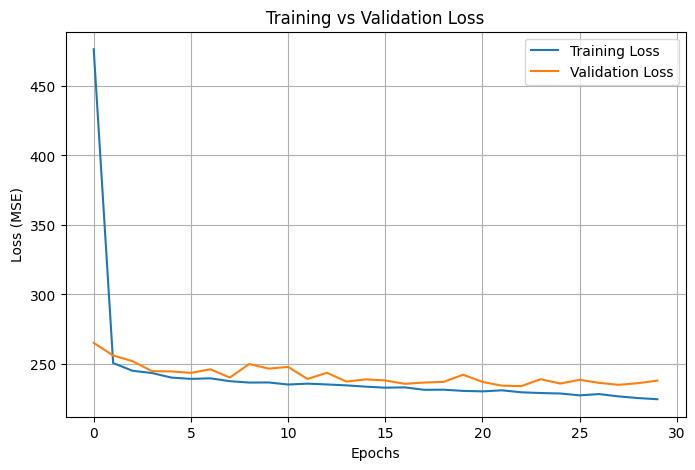

In [239]:
#Lets Plot loss graph
import matplotlib.pyplot as plt

# Extract loss and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
#Model's Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is just sqrt of MSE

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

831/831 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Mean Squared Error (MSE): 235.4253
Mean Absolute Error (MAE): 11.1665
Root Mean Squared Error (RMSE): 15.3436


### **Observation:**
After training different models our Hyper tuned model **“best_model”** comes out to be winner with very slight margin. So final
Mean Squared Error (MSE): 232.2984
Mean Absolute Error (MAE): 11.3470
Root Mean Squared Error (RMSE): 15.241


# **7. Actionable Insights & Recommendations**
1.	After training different models our **Hyper tuned model “best_model”** comes out to be **winner** with very slight margin. So final
*   Mean Squared Error (MSE): 232.2984
*   Mean Absolute Error (MAE): 11.3470
*   Root Mean Squared Error (RMSE): 15.241

2.	With Mean Absolute Error **(MAE): 11.3470** and Root Mean Squared Error **(RMSE): 15.241**, out model is able to do **decent job** in predicting the delivery time.

3.	An accurate delivery times prediction will lead to better **customer satisfaction** and improve customer **trust** in Porter.

4.	Further **more hyperparameter tunings** can be performed to search even better parameters to reduce the loss even further and increase accuracy.

5.	**Additional information** like **weather** condition can be collected and checked for improving models' accuracy.

6.	**Most orders** belong to market id **2 and 4**. Porter should ensure that all good practices for **customer retention** are followed in these market area.

7.	Market id **6** has **least** numbers of order. Porter should strengthen marketing strategy in this area to **acquire new customers**.

8.	**Busiest** part of day is **late night** between **1am to 3am** and there is **very less** order during l**ate morning and afternoon** time. Porter should **regulate** the availability of **delivery agents** accordingly to ensure **cost optimization** and **optimum delivery time**.
